In [1]:
import pandas as pd
import numpy as np
import pickle
import spacy
#pip install spacy  #uncomment first time 

In [5]:
#!pip install spacy #uncomment first time 

In [6]:
#!python -m spacy download ru_core_news_sm  #uncomment first time 

In [2]:
df = pd.read_pickle('goszakupki_okpd_data.pickle')

In [ ]:
#df.take(range(2000000-60,2000000))

Сжали выборку для первого эксперимента

In [3]:
n = 10000

In [18]:
table_2_10_6 = df[:n] 
#table_2_10_6.to_csv('1.csv', encoding='utf8')

In [17]:
#table_2_10_6[n-60:n]

In [ ]:
#table_2_10_6.to_csv('part1.csv')

Загрузили русскую модель из spaCy

In [6]:
nlp = spacy.load('ru_core_news_sm')

Выделили отдельно массив текстовых описаний

In [20]:
text = list(table_2_10_6['text'])

Построение эмбеддингов по текстовым описаниям

In [8]:
embeddings = [nlp(stat).vector for stat in text]

Создание массива меток (оставляем только первые 4 цифры классификатора)

In [12]:
labels = np.array([int(''.join(code[:5].split('.'))) for code in table_2_10_6['OKPD2']])

In [13]:
labels

array([113, 124, 113, ..., 127, 113, 147])

Разбиение выборки на train и test

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(embeddings, labels, test_size=0.2, random_state=42)

Лог регрессия из sklearn

In [15]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=2000, multi_class='ovr', solver ='newton-cg' )  # Увеличение количества итераций для сходимости
model.fit(X_train, y_train)


LogisticRegression(max_iter=2000, multi_class='ovr', solver='newton-cg')

Построение ROC кривой

C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sklearn\metrics\_ranking.py:1132: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(
C:\ProgramData\anaconda3\Lib\site-packages\sk

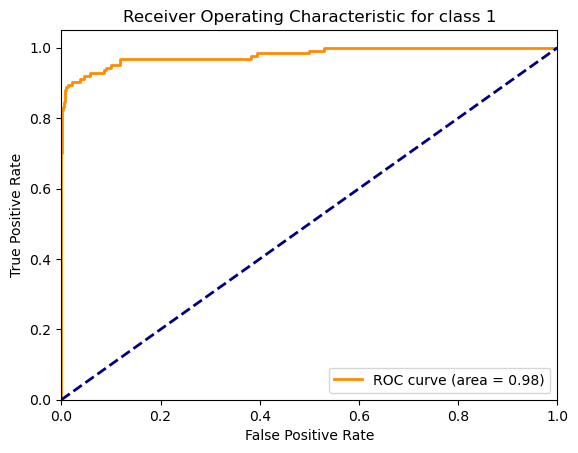

In [16]:
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt

# Бинаризация меток для многоклассовой классификации
y_test_binarized = label_binarize(y_test, classes=np.unique(labels))

# Предсказание вероятностей для всех классов
y_score = model.predict_proba(X_test)

# Вычисление ROC AUC для каждого класса
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(y_test_binarized.shape[1]-1):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Построение ROC-кривой для первого класса
plt.figure()
plt.plot(fpr[0], tpr[0], color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc[0])
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for class 1')
plt.legend(loc="lower right")
plt.show()
